In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

from datetime import datetime
from dateutil.parser import parse

# Data Pre-Processing

In [2]:
# import lending club data for analysis 
LC_Data = pd.read_csv('appl__accepted_20072019Q3.csv', low_memory=False)

In [3]:
#print data shape
print(LC_Data.shape)

(2650550, 150)


In [4]:
#print data head
LC_Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#print total column list 
LC_Data.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [10]:
#import data dictionary
LC_Data_Dictionary = pd.read_csv('LCDataDictionary.csv',encoding= 'unicode_escape')

In [11]:
#print data dictionary shape
print(LC_Data_Dictionary.shape)

(153, 11)


In [12]:
LC_Data_Dictionary.head()

,LoanStatNew,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,all_util,Balance to credit limit on all trades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_inc,The self-reported annual income provided by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#search for null values in data dictionary dataset
LC_Data_Dictionary.isna().sum()

LoanStatNew      2
Description      1
Unnamed: 2     153
Unnamed: 3     153
Unnamed: 4     153
Unnamed: 5     153
Unnamed: 6     153
Unnamed: 7     153
Unnamed: 8     153
Unnamed: 9     153
Unnamed: 10    153
dtype: int64

In [14]:
#Remove all columns will null value greater than 50%
LC_Data_Dictionary_Update = LC_Data_Dictionary.loc[:, LC_Data_Dictionary.isnull().sum() < 0.5*LC_Data_Dictionary.shape[0]]

In [15]:
print(LC_Data_Dictionary_Update.shape)

(153, 2)


In [16]:
LC_Data_Dictionary_Update.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [17]:
#print column list of Data Dictionary
print(LC_Data_Dictionary_Update.columns.tolist())

['LoanStatNew', 'Description']


In [18]:
#Rename Column of Data Dictionary
LC_Data_Dictionary_Update = LC_Data_Dictionary_Update.rename(columns={'LoanStatNew': 'Variable Name', 'Description': 'Description'})

In [19]:
LC_Data.isna().sum()
#to check the sum of null values in each column of original dataset of lending club

id                             0
member_id                2650517
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2615962
settlement_date          2615962
settlement_amount        2615962
settlement_percentage    2615962
settlement_term          2615962
Length: 150, dtype: int64

In [20]:
LC_Data_Updated = LC_Data.loc[:, LC_Data.isnull().sum() < 0.5*LC_Data.shape[0]]
#Dropping all columns with 50% missing values

In [21]:
#print data shape
print(LC_Data_Updated.shape)

(2650517, 106)


In [22]:
#merge data set with data dictionary with new shape 
LC_Data_Explanation = pd.DataFrame(LC_Data_Updated.dtypes,columns=['dtypes'])
LC_Data_Explanation = LC_Data_Explanation.reset_index()
LC_Data_Explanation['Variable Name'] = LC_Data_Explanation['index']
LC_Data_Explanation = LC_Data_Explanation[['Variable Name','dtypes']]
LC_Data_Explanation['first value'] = LC_Data_Updated.loc[0].values
LC_Variables_Explained = LC_Data_Explanation.merge(LC_Data_Dictionary_Update, on='Variable Name',how='left')

In [23]:
LC_Variables_Explained.head()

,Variable Name,dtypes,first value,Description
0,id,object,68407277,A unique LC assigned ID for the loan listing.
1,loan_amnt,float64,3600,The listed amount of the loan applied for by t...
2,funded_amnt,float64,3600,The total amount committed to that loan at tha...
3,funded_amnt_inv,float64,3600,The total amount committed by investors for th...
4,term,object,36 months,The number of payments on the loan. Values are...


In [24]:
#print number of null value  of high fico range
LC_Data_Updated.last_fico_range_high.isna().sum()

0

In [25]:
#print number of null value of low fico range
LC_Data_Updated.last_fico_range_low.isna().sum()

0

In [26]:
#Calculating the mean fico score in order to set target variable
#drop high and low fico range
LC_Data_Updated['last_fico_range'] = LC_Data_Updated.last_fico_range_low.astype('str') + '-' + LC_Data_Updated.last_fico_range_high.astype('str')
LC_Data_Updated['Mean_Fico'] = (LC_Data_Updated.last_fico_range_low + LC_Data_Updated.last_fico_range_high)/2
LC_Data_Updated.drop(['last_fico_range_high','last_fico_range_low'],1, inplace=True)

C:\Users\Nazmus\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nazmus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Nazmus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [27]:
#Target Column is Mean_Fico
LC_Data_Updated.Mean_Fico.value_counts()

692.0    101526
697.0    100170
702.0    100043
707.0     99899
712.0     96670
          ...  
832.0      3819
837.0      1862
842.0       943
847.5       410
0.0         238
Name: Mean_Fico, Length: 72, dtype: int64

In [28]:
print(LC_Data_Updated.Mean_Fico.shape)

(2650517,)


In [29]:
#Setting Binary for Mean_FICO
LC_Data_Updated["Mean_Fico"] = np.where(LC_Data_Updated["Mean_Fico"]>=600, 'Good', 'Bad') 

C:\Users\Nazmus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#Rename target variable and classified it into binary
LC_Data_Updated['FICO_Score'] = np.where(LC_Data_Updated.loc[:, 'Mean_Fico'].isin(['Bad']), 0, 1)

C:\Users\Nazmus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
##value counts after categorization of  target variable 
LC_Data_Updated.FICO_Score.value_counts()

1    2325954
0     324563
Name: FICO_Score, dtype: int64

In [32]:
##Dropping the Orgininal mean_FICO column since we already converted the target function to binary
LC_Data_Updated.drop(columns = ['Mean_Fico'], inplace = True)

In [33]:
#Analyzing Predictive Column
len(LC_Data_Updated.columns)

106

In [34]:
#creation of a list in order to store the columns that will retian as categorical or numerical
#------------------------------------------------------------------------
#X1:Payment History
#X2:Account Owned
#X3:Length of Credit History
#X4:Credit Mix
#X5:New Credit 
Categorical_Features_X1=[]
Numerical_Features_X1=[]
Categorical_Features_X2=[]
Numerical_Features_X2=[]
Categorical_Features_X3=[]
Numerical_Features_X3=[]
Categorical_Features_X4=[]
Numerical_Features_X4=[]
Categorical_Features_X5=[]
Numerical_Features_X5=[]

In [35]:
#print number of column with different set attribute
LC_Variables_Explained[:15]

,Variable Name,dtypes,first value,Description
0,id,object,68407277,A unique LC assigned ID for the loan listing.
1,loan_amnt,float64,3600,The listed amount of the loan applied for by t...
2,funded_amnt,float64,3600,The total amount committed to that loan at tha...
3,funded_amnt_inv,float64,3600,The total amount committed by investors for th...
4,term,object,36 months,The number of payments on the loan. Values are...
5,int_rate,object,13.99,Interest Rate on the loan
6,installment,float64,123.03,The monthly payment owed by the borrower if th...
7,grade,object,C,LC assigned loan grade
8,sub_grade,object,C4,LC assigned loan subgrade
9,emp_title,object,leadman,The job title supplied by the Borrower when ap...


In [36]:
#Add variable with respect to numerical and catagorical characteristic 
Numerical_Features_X2.append('loan_amnt')
Numerical_Features_X1.append('installment')
Categorical_Features_X3.append('term')

In [37]:
#droped unrequired column 
LC_Data_Updated.drop(columns = ['id','funded_amnt','funded_amnt_inv','int_rate','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','issue_d'], inplace = True)

C:\Users\Nazmus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
#print number of column with different set attribute
LC_Variables_Explained[15:30]

,Variable Name,dtypes,first value,Description
15,loan_status,object,Fully Paid,Current status of the loan
16,pymnt_plan,object,n,Indicates if a payment plan has been put in pl...
17,url,object,https://lendingclub.com/browse/loanDetail.acti...,URL for the LC page with listing data.
18,purpose,object,debt_consolidation,A category provided by the borrower for the lo...
19,title,object,Debt consolidation,The loan title provided by the borrower
20,zip_code,object,190xx,The first 3 numbers of the zip code provided b...
21,addr_state,object,PA,The state provided by the borrower in the loan...
22,dti,float64,5.91,A ratio calculated using the borrowers total ...
23,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of ...
24,earliest_cr_line,object,Aug-2003,The month the borrower's earliest reported cre...


In [39]:
#Add variable with respect to numerical and catagorical characteristic 
Categorical_Features_X1.append('loan_status')
Numerical_Features_X1.append('delinq_2yrs')
Numerical_Features_X4.append('open_acc')

In [40]:
#drop unrequired column 
LC_Data_Updated.drop(columns = ['pymnt_plan', 'url','purpose','title','zip_code','addr_state','dti','fico_range_low','fico_range_high','inq_last_6mths','earliest_cr_line','pub_rec',], inplace = True)

C:\Users\Nazmus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
#print number of column with different set attribute
LC_Variables_Explained[30:45]

,Variable Name,dtypes,first value,Description
30,revol_bal,float64,2765,Total credit revolving balance
31,revol_util,object,29.7,"Revolving line utilization rate, or the amount..."
32,total_acc,float64,13,The total number of credit lines currently in ...
33,initial_list_status,object,w,The initial listing status of the loan. Possib...
34,out_prncp,float64,0,Remaining outstanding principal for total amou...
35,out_prncp_inv,float64,0,Remaining outstanding principal for portion of...
36,total_pymnt,float64,4421.72,Payments received to date for total amount funded
37,total_pymnt_inv,float64,4421.72,Payments received to date for portion of total...
38,total_rec_prncp,float64,3600,Principal received to date
39,total_rec_int,float64,821.72,Interest received to date


In [42]:
#Add variable with respect to numerical and catagorical characteristic 
Numerical_Features_X2.append('revol_bal')
Numerical_Features_X2.append('revol_util')
Numerical_Features_X4.append('total_acc')
Numerical_Features_X2.append('out_prncp')
Numerical_Features_X2.append('recoveries')

In [43]:
#drop unrequired column 
LC_Data_Updated.drop(columns = ['initial_list_status','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','total_pymnt'], inplace = True)

C:\Users\Nazmus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
#print number of column with different set attribute
LC_Variables_Explained[45:60]

,Variable Name,dtypes,first value,Description
45,last_credit_pull_d,object,Mar-2019,The most recent month LC pulled credit for thi...
46,last_fico_range_high,float64,564,The upper boundary range the borrowers last F...
47,last_fico_range_low,float64,560,The lower boundary range the borrowers last F...
48,collections_12_mths_ex_med,float64,0,Number of collections in 12 months excluding m...
49,policy_code,float64,1,publicly available policy_code=1\nnew products...
50,application_type,object,Individual,Indicates whether the loan is an individual ap...
51,acc_now_delinq,float64,0,The number of accounts on which the borrower i...
52,tot_coll_amt,float64,722,Total collection amounts ever owed
53,tot_cur_bal,float64,144904,Total current balance of all accounts
54,open_acc_6m,float64,2,Number of open trades in last 6 months


In [45]:
#Add variable with respect to numerical and catagorical characteristic 
Numerical_Features_X1.append('acc_now_delinq')
Numerical_Features_X1.append('tot_coll_amt')

In [46]:
#drop unrequired column 
LC_Data_Updated.drop(columns = ['collections_12_mths_ex_med','policy_code','application_type','open_acc_6m','open_act_il','open_il_12m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','last_credit_pull_d','tot_cur_bal'], inplace = True)

C:\Users\Nazmus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
#print number of column with different set attribute
LC_Variables_Explained[60:75]

,Variable Name,dtypes,first value,Description
60,il_util,float64,36,Ratio of total current balance to high credit/...
61,open_rv_12m,float64,3,Number of revolving trades opened in past 12 m...
62,open_rv_24m,float64,3,Number of revolving trades opened in past 24 m...
63,max_bal_bc,float64,722,Maximum current balance owed on all revolving ...
64,all_util,float64,34,Balance to credit limit on all trades
65,total_rev_hi_lim,float64,9300,NaN
66,inq_fi,float64,3,Number of personal finance inquiries
67,total_cu_tl,float64,1,Number of finance trades
68,inq_last_12m,float64,4,Number of credit inquiries in past 12 months
69,acc_open_past_24mths,float64,4,Number of trades opened in past 24 months.


In [48]:
#Add variable with respect to numerical and catagorical characteristic 
Numerical_Features_X2.append('max_bal_bc')
Numerical_Features_X1.append('chargeoff_within_12_mths')
Numerical_Features_X1.append('delinq_amnt')

In [49]:
#drop unrequired column 
LC_Data_Updated.drop(columns = ['il_util','open_rv_12m','open_rv_24m','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util'], inplace = True)

C:\Users\Nazmus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
#print number of column with different set attribute
LC_Variables_Explained[75:90]

,Variable Name,dtypes,first value,Description
75,mo_sin_old_il_acct,float64,148,Months since oldest bank installment account o...
76,mo_sin_old_rev_tl_op,float64,128,Months since oldest revolving account opened
77,mo_sin_rcnt_rev_tl_op,float64,3,Months since most recent revolving account opened
78,mo_sin_rcnt_tl,float64,3,Months since most recent account opened
79,mort_acc,float64,1,Number of mortgage accounts.
80,mths_since_recent_bc,float64,4,Months since most recent bankcard account opened.
81,mths_since_recent_inq,float64,4,Months since most recent inquiry.
82,num_accts_ever_120_pd,float64,2,Number of accounts ever 120 or more days past due
83,num_actv_bc_tl,float64,2,Number of currently active bankcard accounts
84,num_actv_rev_tl,float64,4,Number of currently active revolving trades


In [51]:
#Add variable with respect to numerical and catagorical characteristic 
Numerical_Features_X3.append('mo_sin_old_il_acct')
Numerical_Features_X3.append('mo_sin_old_rev_tl_op')
Numerical_Features_X5.append('mo_sin_rcnt_rev_tl_op')
Numerical_Features_X5.append('mo_sin_rcnt_tl')
Numerical_Features_X4.append('mort_acc')
Numerical_Features_X1.append('mths_since_recent_bc')
Numerical_Features_X1.append('num_accts_ever_120_pd')
Numerical_Features_X4.append('num_op_rev_tl')
Numerical_Features_X4.append('num_rev_accts')

In [52]:
#drop unrequired column 
LC_Data_Updated.drop(columns = ['mths_since_recent_inq','num_actv_bc_tl','num_bc_sats','num_bc_tl','num_il_tl'], inplace = True)

C:\Users\Nazmus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
#print number of column with different set attribute
LC_Variables_Explained[90:108]

,Variable Name,dtypes,first value,Description
90,num_rev_tl_bal_gt_0,float64,4,Number of revolving trades with balance >0
91,num_sats,float64,7,Number of satisfactory accounts
92,num_tl_120dpd_2m,float64,0,Number of accounts currently 120 days past due...
93,num_tl_30dpd,float64,0,Number of accounts currently 30 days past due ...
94,num_tl_90g_dpd_24m,float64,0,Number of accounts 90 or more days past due in...
95,num_tl_op_past_12m,float64,3,Number of accounts opened in past 12 months
96,pct_tl_nvr_dlq,float64,76.9,Percent of trades never delinquent
97,percent_bc_gt_75,float64,0,Percentage of all bankcard accounts > 75% of l...
98,pub_rec_bankruptcies,float64,0,Number of public record bankruptcies
99,tax_liens,float64,0,Number of tax liens


In [54]:
#Add variable with respect to numerical and catagorical characteristic 
Numerical_Features_X1.append('num_tl_120dpd_2m')
Numerical_Features_X1.append('num_tl_30dpd')
Numerical_Features_X1.append('num_tl_90g_dpd_24m')
Numerical_Features_X1.append('pub_rec_bankruptcies')

In [55]:
#drop unrequired column 
LC_Data_Updated.drop(columns = ['num_rev_tl_bal_gt_0','num_sats','pct_tl_nvr_dlq','num_tl_op_past_12m','percent_bc_gt_75','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','hardship_flag','debt_settlement_flag'], inplace = True)

C:\Users\Nazmus\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
#print data shape after chosing variable related to our analysis
print(LC_Data_Updated.shape)

(2650517, 32)


In [57]:
#Find null values
LC_Data_Updated.isna().sum()

loan_amnt                        0
term                             0
installment                      0
loan_status                      0
delinq_2yrs                     29
open_acc                        29
revol_bal                        0
revol_util                    2287
total_acc                       29
out_prncp                        0
recoveries                       0
acc_now_delinq                  29
tot_coll_amt                 70276
max_bal_bc                  866129
chargeoff_within_12_mths       145
delinq_amnt                     29
mo_sin_old_il_acct          149860
mo_sin_old_rev_tl_op         70277
mo_sin_rcnt_rev_tl_op        70277
mo_sin_rcnt_tl               70276
mort_acc                     50030
mths_since_recent_bc         77879
num_accts_ever_120_pd        70276
num_actv_rev_tl              70276
num_op_rev_tl                70276
num_rev_accts                70277
num_tl_120dpd_2m            160042
num_tl_30dpd                 70276
num_tl_90g_dpd_24m  

In [58]:
#drop null rows starting with the highest count
LC_Data_Updated.dropna(subset=['mo_sin_old_il_acct','num_tl_120dpd_2m'],inplace=True)

C:\Users\Nazmus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
LC_Data_Updated.isna().sum()

loan_amnt                        0
term                             0
installment                      0
loan_status                      0
delinq_2yrs                      0
open_acc                         0
revol_bal                        0
revol_util                    2078
total_acc                        0
out_prncp                        0
recoveries                       0
acc_now_delinq                   0
tot_coll_amt                     0
max_bal_bc                  745158
chargeoff_within_12_mths         0
delinq_amnt                      0
mo_sin_old_il_acct               0
mo_sin_old_rev_tl_op             1
mo_sin_rcnt_rev_tl_op            1
mo_sin_rcnt_tl                   0
mort_acc                         0
mths_since_recent_bc         26843
num_accts_ever_120_pd            0
num_actv_rev_tl                  0
num_op_rev_tl                    0
num_rev_accts                    1
num_tl_120dpd_2m                 0
num_tl_30dpd                     0
num_tl_90g_dpd_24m  

In [60]:
#Drop Null Rows
LC_Data_Updated.dropna(subset=['mths_since_recent_bc','revol_util','num_rev_accts'],inplace=True)

C:\Users\Nazmus\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
LC_Data_Updated.isna().sum()

loan_amnt                        0
term                             0
installment                      0
loan_status                      0
delinq_2yrs                      0
open_acc                         0
revol_bal                        0
revol_util                       0
total_acc                        0
out_prncp                        0
recoveries                       0
acc_now_delinq                   0
tot_coll_amt                     0
max_bal_bc                  738321
chargeoff_within_12_mths         0
delinq_amnt                      0
mo_sin_old_il_acct               0
mo_sin_old_rev_tl_op             0
mo_sin_rcnt_rev_tl_op            0
mo_sin_rcnt_tl                   0
mort_acc                         0
mths_since_recent_bc             0
num_accts_ever_120_pd            0
num_actv_rev_tl                  0
num_op_rev_tl                    0
num_rev_accts                    0
num_tl_120dpd_2m                 0
num_tl_30dpd                     0
num_tl_90g_dpd_24m  

In [62]:
#Print Updated Data Shape
print(LC_Data_Updated.shape)

(2386267, 32)


In [63]:
#Columns with unique value
LC_Data_Updated.reset_index(inplace=True)

In [64]:
#Use to check whether any variable has binary rows and if one of the rows has less than 10% we drop that column
for col in LC_Data_Updated.columns:
    if (len(LC_Data_Updated[col].unique()) < 10):
        print(LC_Data_Updated[col].value_counts())
        print()

 36 months    1673631
 60 months     712636
Name: term, dtype: int64

Current               1129712
Fully Paid             977852
Charged Off            239056
Late (31-120 days)      24211
In Grace Period         10383
Late (16-30 days)        5013
Default                    40
Name: loan_status, dtype: int64

0.0     2378125
1.0        7688
2.0         393
3.0          44
4.0          10
5.0           3
6.0           2
14.0          1
7.0           1
Name: acc_now_delinq, dtype: int64

0.0    2385038
1.0       1178
2.0         45
3.0          3
7.0          1
6.0          1
4.0          1
Name: num_tl_120dpd_2m, dtype: int64

0.0    2380850
1.0       5149
2.0        236
3.0         25
4.0          7
Name: num_tl_30dpd, dtype: int64

1    2104042
0     282225
Name: FICO_Score, dtype: int64



In [65]:
#Data Frame for Categorical Data X1
Categorical_Data_X1=pd.DataFrame()
for col in Categorical_Features_X1:
    Categorical_Data_X1=pd.concat([ Categorical_Data_X1, LC_Data_Updated[col]], axis= 1)

Categorical_Data_X1.head()

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Current
4,Fully Paid


In [66]:
#Data Frame for Categorical Data X2
Categorical_Data_X2=pd.DataFrame()
for col in Categorical_Features_X2:
    Categorical_Data_X2=pd.concat([ Categorical_Data_X2, LC_Data_Updated[col]], axis= 1)

Categorical_Data_X2.head()

""


In [67]:
#Data Frame for Categorical Data X3
Categorical_Data_X3=pd.DataFrame()
for col in Categorical_Features_X3:
    Categorical_Data_X3=pd.concat([ Categorical_Data_X3, LC_Data_Updated[col]], axis= 1)

Categorical_Data_X3.head()

,term
0,36 months
1,36 months
2,60 months
3,60 months
4,60 months


In [68]:
#Data Frame for Categorical Data X4
Categorical_Data_X4=pd.DataFrame()
for col in Categorical_Features_X4:
    Categorical_Data_X4=pd.concat([ Categorical_Data_X4, LC_Data_Updated[col]], axis= 1)

Categorical_Data_X4.head()

""


In [69]:
#Data Frame for Categorical Data X5
Categorical_Data_X5=pd.DataFrame()
for col in Categorical_Features_X5:
    Categorical_Data_X5=pd.concat([ Categorical_Data_X5, LC_Data_Updated[col]], axis= 1)

Categorical_Data_X5.head()

""


In [70]:
#Data Frame for Numerical Data X1
#-----------------------------------------------------------------------------------------------------------------------------
Numerical_Data_X1=pd.DataFrame()
for col in Numerical_Features_X1:
    Numerical_Data_X1=pd.concat([ Numerical_Data_X1, LC_Data_Updated[col]], axis= 1)

Numerical_Data_X1.head()

,installment,delinq_2yrs,acc_now_delinq,tot_coll_amt,chargeoff_within_12_mths,delinq_amnt,mths_since_recent_bc,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pub_rec_bankruptcies
0,123.03,0.0,0.0,722.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0
1,820.28,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,432.66,0.0,0.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0,0.0
3,829.90,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,289.91,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#Data Frame for Numerical Data X2
#-----------------------------------------------------------------------------------------------------------------------------
Numerical_Data_X2=pd.DataFrame()
for col in Numerical_Features_X2:
    Numerical_Data_X2=pd.concat([ Numerical_Data_X2, LC_Data_Updated[col]], axis= 1)

Numerical_Data_X2.head()

,loan_amnt,revol_bal,revol_util,out_prncp,recoveries,max_bal_bc
0,3600.0,2765.0,29.7,0.00,0.0,722.0
1,24700.0,21470.0,19.2,0.00,0.0,6472.0
2,20000.0,7869.0,56.2,0.00,0.0,2081.0
3,35000.0,7802.0,11.6,15897.65,0.0,6987.0
4,10400.0,21929.0,64.5,0.00,0.0,9702.0


In [72]:
#Data Frame for Numerical Data X3
#-----------------------------------------------------------------------------------------------------------------------------
Numerical_Data_X3=pd.DataFrame()
for col in Numerical_Features_X3:
    Numerical_Data_X3=pd.concat([ Numerical_Data_X3, LC_Data_Updated[col]], axis= 1)

Numerical_Data_X3.head()

,mo_sin_old_il_acct,mo_sin_old_rev_tl_op
0,148.0,128.0
1,113.0,192.0
2,125.0,184.0
3,36.0,87.0
4,128.0,210.0


In [73]:
#Data Frame for Numerical Data X4
#-----------------------------------------------------------------------------------------------------------------------------
Numerical_Data_X4=pd.DataFrame()
for col in Numerical_Features_X4:
    Numerical_Data_X4=pd.concat([ Numerical_Data_X4, LC_Data_Updated[col]], axis= 1)

Numerical_Data_X4.head()

,open_acc,total_acc,mort_acc,num_op_rev_tl,num_rev_accts
0,7.0,13.0,1.0,4.0,9.0
1,22.0,38.0,4.0,20.0,27.0
2,6.0,18.0,5.0,4.0,7.0
3,13.0,17.0,1.0,10.0,13.0
4,12.0,35.0,6.0,7.0,19.0


In [74]:
#Data Frame for Numerical Data X5
#-----------------------------------------------------------------------------------------------------------------------------
Numerical_Data_X5=pd.DataFrame()
for col in Numerical_Features_X5:
    Numerical_Data_X5=pd.concat([ Numerical_Data_X5, LC_Data_Updated[col]], axis= 1)

Numerical_Data_X5.head()

,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl
0,3.0,3.0
1,2.0,2.0
2,14.0,14.0
3,2.0,2.0
4,4.0,4.0


In [75]:
#Drop Column due to high null value
Numerical_Data_X2.drop(columns = ['max_bal_bc'], inplace = True)

In [76]:
Numerical_Data_X1.columns.unique

<bound method Index.unique of Index(['installment', 'delinq_2yrs', 'acc_now_delinq', 'tot_coll_amt',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mths_since_recent_bc',
       'num_accts_ever_120_pd', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'pub_rec_bankruptcies'],
      dtype='object')>

In [77]:
#print numerical data info
Numerical_Data_X1.info()
Numerical_Data_X2.info()
Numerical_Data_X3.info()
Numerical_Data_X4.info()
Numerical_Data_X5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2386267 entries, 0 to 2386266
Data columns (total 12 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   installment               float64
 1   delinq_2yrs               float64
 2   acc_now_delinq            float64
 3   tot_coll_amt              float64
 4   chargeoff_within_12_mths  float64
 5   delinq_amnt               float64
 6   mths_since_recent_bc      float64
 7   num_accts_ever_120_pd     float64
 8   num_tl_120dpd_2m          float64
 9   num_tl_30dpd              float64
 10  num_tl_90g_dpd_24m        float64
 11  pub_rec_bankruptcies      float64
dtypes: float64(12)
memory usage: 236.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2386267 entries, 0 to 2386266
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   loan_amnt   float64
 1   revol_bal   float64
 2   revol_util  object 
 3   out_prncp   float64
 4   recoveries  float64
dtypes: float64(4), 

In [78]:
#find abnormality in data
Numerical_Data_X2.revol_util.unique()

array(['29.7', '19.2', '56.2', ..., '108.80%', '125.70%', '106.30%'],
      dtype=object)

In [79]:
#convert object type into float
Numerical_Data_X2['revol_util']=Numerical_Data_X2['revol_util'].str.strip('%').astype(float)

In [80]:
#covert all into float data
for col in Numerical_Data_X1.columns:
    Numerical_Data_X1[col].astype(float)

In [81]:
#covert all into float data
for col in Numerical_Data_X2.columns:
    Numerical_Data_X2[col].astype(float)

In [82]:
#covert all into float data
for col in Numerical_Data_X3.columns:
    Numerical_Data_X3[col].astype(float)

In [83]:
#covert all into float data
for col in Numerical_Data_X4.columns:
    Numerical_Data_X4[col].astype(float)

In [84]:
#covert all into float data
for col in Numerical_Data_X5.columns:
    Numerical_Data_X5[col].astype(float)

In [85]:
#description of numerical data
Numerical_Data_X1.describe()

,installment,delinq_2yrs,acc_now_delinq,tot_coll_amt,chargeoff_within_12_mths,delinq_amnt,mths_since_recent_bc,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,pub_rec_bankruptcies
count,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06
mean,4.553606e+02,2.969751e-01,3.643348e-03,2.295407e+02,8.130272e-03,9.911923e+00,2.529821e+01,5.119972e-01,5.422696e-04,2.398726e-03,7.478250e-02,1.257458e-01
std,2.717466e+02,8.527318e-01,6.530344e-02,8.176505e+03,1.015565e-01,6.184408e+02,3.272307e+01,1.382808e+00,2.494867e-02,5.185395e-02,4.672636e-01,3.596420e-01
min,4.930000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.578700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.858000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.082200e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.719830e+03,5.800000e+01,1.400000e+01,9.152545e+06,9.000000e+00,1.384740e+05,6.750000e+02,5.800000e+01,7.000000e+00,4.000000e+00,5.800000e+01,1.200000e+01


In [86]:
#description of numerical data
Numerical_Data_X2.describe()

,loan_amnt,revol_bal,revol_util,out_prncp,recoveries
count,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06
mean,1.547219e+04,1.677451e+04,4.904508e+01,5.678958e+03,1.223377e+02
std,9.432191e+03,2.212674e+04,2.463852e+01,8.447919e+03,6.948068e+02
min,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,6.112000e+03,3.010000e+01,0.000000e+00,0.000000e+00
50%,1.350000e+04,1.157800e+04,4.860000e+01,0.000000e+00,0.000000e+00
75%,2.040000e+04,2.061900e+04,6.790000e+01,9.077920e+03,0.000000e+00
max,4.000000e+04,2.904836e+06,3.666000e+02,4.000000e+04,4.180325e+04


In [87]:
#description of numerical data
Numerical_Data_X3.describe()

,mo_sin_old_il_acct,mo_sin_old_rev_tl_op
count,2.386267e+06,2.386267e+06
mean,1.254888e+02,1.799992e+02
std,5.383931e+01,9.673330e+01
min,0.000000e+00,1.000000e+00
25%,9.400000e+01,1.150000e+02
50%,1.300000e+02,1.620000e+02
75%,1.540000e+02,2.290000e+02
max,9.990000e+02,9.990000e+02


In [88]:
#description of numerical data
Numerical_Data_X4.describe()

,open_acc,total_acc,mort_acc,num_op_rev_tl,num_rev_accts
count,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06,2.386267e+06
mean,1.185993e+01,2.449583e+01,1.548817e+00,8.326094e+00,1.393035e+01
std,5.690434e+00,1.197168e+01,1.881979e+00,4.720309e+00,7.987817e+00
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.000000e+00,1.600000e+01,0.000000e+00,5.000000e+00,8.000000e+00
50%,1.100000e+01,2.300000e+01,1.000000e+00,7.000000e+00,1.200000e+01
75%,1.500000e+01,3.100000e+01,3.000000e+00,1.100000e+01,1.800000e+01
max,1.010000e+02,1.760000e+02,9.400000e+01,9.100000e+01,1.510000e+02


In [89]:
#description of numerical data
Numerical_Data_X5.describe()

,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl
count,2.386267e+06,2.386267e+06
mean,1.425329e+01,8.199328e+00
std,1.754188e+01,8.611712e+00
min,0.000000e+00,0.000000e+00
25%,4.000000e+00,3.000000e+00
50%,9.000000e+00,6.000000e+00
75%,1.800000e+01,1.100000e+01
max,5.640000e+02,1.970000e+02


In [90]:
#print categorical data x1 info 
Categorical_Data_X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2386267 entries, 0 to 2386266
Data columns (total 1 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   loan_status  object
dtypes: object(1)
memory usage: 36.4+ MB


In [91]:
#print categorical data x2 info 
Categorical_Data_X2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [92]:
#print categorical data x3 info 
Categorical_Data_X3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2386267 entries, 0 to 2386266
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   term    object
dtypes: object(1)
memory usage: 36.4+ MB


In [93]:
#print categorical data x4 info 
Categorical_Data_X4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [94]:
#print categorical data x5 info 
Categorical_Data_X5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [95]:
for col in Categorical_Data_X1.columns:
    print(col,'\n'*2,Categorical_Data_X1[col].unique(),'\n'*3)
#Converting Ordinal Value(Categorical Data)

loan_status 

 ['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default'] 





In [96]:
for col in Categorical_Data_X3.columns:
    print(col,'\n'*2,Categorical_Data_X3[col].unique(),'\n'*3)
#Converting Ordinal Value(Categorical Data)

term 

 [' 36 months' ' 60 months'] 





In [97]:
for col in Categorical_Data_X4.columns:
    print(col,'\n'*2,Categorical_Data_X4[col].unique(),'\n'*3)
#Converting Ordinal Value(Categorical Data)

In [98]:
#Dummy Variables of Categorical data x1
#------------------------------------------------------------------------------------------------------------------------------
for col in Categorical_Data_X1.columns:
    Dummy_Variables_X1 = pd.get_dummies(Categorical_Data_X1[col])
    Dummy_Variables_X1.drop(Dummy_Variables_X1.columns[-1],axis=1,inplace=True)# dropping one of each to reduce multicoloniearity
    Categorical_Data_X1 = pd.concat([Categorical_Data_X1, Dummy_Variables_X1], axis=1)
    Categorical_Data_X1.drop(col, axis=1, inplace=True)

In [99]:
#Dummy Variables of Categorical data x3
#------------------------------------------------------------------------------------------------------------------------------
for col in Categorical_Data_X3.columns:
    Dummy_Variables_X3 = pd.get_dummies(Categorical_Data_X3[col])
    Dummy_Variables_X3.drop(Dummy_Variables_X3.columns[-1],axis=1,inplace=True)# dropping one of each to reduce multicoloniearity
    Categorical_Data_X3 = pd.concat([Categorical_Data_X3, Dummy_Variables_X3], axis=1)
    Categorical_Data_X3.drop(col, axis=1, inplace=True)

In [100]:
#Dummy Variables of Categorical data x4
#------------------------------------------------------------------------------------------------------------------------------
for col in Categorical_Data_X4.columns:
    Dummy_Variables_X4 = pd.get_dummies(Categorical_Data_X4[col])
    Dummy_Variables_X4.drop(Dummy_Variables_X4.columns[-1],axis=1,inplace=True)# dropping one of each to reduce multicoloniearity
    Categorical_Data_X4 = pd.concat([Categorical_Data_X4, Dummy_Variables_X4], axis=1)
    Categorical_Data_X4.drop(col, axis=1, inplace=True)

In [101]:
#Dummy Variables of Categorical data x5
#------------------------------------------------------------------------------------------------------------------------------
for col in Categorical_Data_X5.columns:
    Dummy_Variables_X5 = pd.get_dummies(Categorical_Data_X5[col])
    Dummy_Variables_X5.drop(Dummy_Variables_X5.columns[-1],axis=1,inplace=True)# dropping one of each to reduce multicoloniearity
    Categorical_Data_X5 = pd.concat([Categorical_Data_X5, Dummy_Variables_X5], axis=1)
    Categorical_Data_X5.drop(col, axis=1, inplace=True)

In [102]:
Categorical_Data_X1.head()

,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days)
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [103]:
Categorical_Data_X3.head()

,36 months
0,1
1,1
2,0
3,0
4,0


In [104]:
Categorical_Data_X4.head()

""


In [105]:
#covert into int
for col in Categorical_Data_X1.columns:
    Categorical_Data_X1[col].astype(int)

In [106]:
#covert into int
for col in Categorical_Data_X2.columns:
    Categorical_Data_X2[col].astype(int)

In [107]:
#covert into int
for col in Categorical_Data_X3.columns:
    Categorical_Data_X3[col].astype(int)

In [108]:
#covert into int
for col in Categorical_Data_X4.columns:
    Categorical_Data_X4[col].astype(int)

In [109]:
#covert into int
for col in Categorical_Data_X5.columns:
    Categorical_Data_X5[col].astype(int)

In [110]:
#Searching for null value
Numerical_Data_X1.isna().sum()

installment                 0
delinq_2yrs                 0
acc_now_delinq              0
tot_coll_amt                0
chargeoff_within_12_mths    0
delinq_amnt                 0
mths_since_recent_bc        0
num_accts_ever_120_pd       0
num_tl_120dpd_2m            0
num_tl_30dpd                0
num_tl_90g_dpd_24m          0
pub_rec_bankruptcies        0
dtype: int64

In [111]:
#Allocating weight to numerical data x1
Numerical_Data_X1_Updated=(Numerical_Data_X1*0.35)

In [112]:
#Allocating weight to numerical data x2
Numerical_Data_X2_Updated=(Numerical_Data_X2*0.30)

In [113]:
#Allocating weight to numerical data x3
Numerical_Data_X3_Updated=(Numerical_Data_X3*0.15)

In [114]:
#Allocating weight to numerical data x4
Numerical_Data_X4_Updated=(Numerical_Data_X4*0.10)

In [115]:
#Allocating weight to numerical data x5
Numerical_Data_X5_Updated=(Numerical_Data_X5*0.10)

In [116]:
#Merging the numerical data of all the categories x1+ x2+ x3+ x4+ x5 into one
Numerical_Data_Merged=pd.concat([Numerical_Data_X1_Updated,Numerical_Data_X2_Updated,Numerical_Data_X3_Updated,Numerical_Data_X4_Updated,Numerical_Data_X5_Updated],axis=1)

In [117]:
Numerical_Data_Merged.isna().sum()

installment                 0
delinq_2yrs                 0
acc_now_delinq              0
tot_coll_amt                0
chargeoff_within_12_mths    0
delinq_amnt                 0
mths_since_recent_bc        0
num_accts_ever_120_pd       0
num_tl_120dpd_2m            0
num_tl_30dpd                0
num_tl_90g_dpd_24m          0
pub_rec_bankruptcies        0
loan_amnt                   0
revol_bal                   0
revol_util                  0
out_prncp                   0
recoveries                  0
mo_sin_old_il_acct          0
mo_sin_old_rev_tl_op        0
open_acc                    0
total_acc                   0
mort_acc                    0
num_op_rev_tl               0
num_rev_accts               0
mo_sin_rcnt_rev_tl_op       0
mo_sin_rcnt_tl              0
dtype: int64

In [118]:
#Allocating weight to categorical data x1
Categorical_Data_X1_Updated=(Categorical_Data_X1*0.35)

In [119]:
#Allocating weight to categorical data x2
Categorical_Data_X2_Updated=(Categorical_Data_X2*0.30)

In [120]:
#Allocating weight to categorical data x3
Categorical_Data_X3_Updated=(Categorical_Data_X3*0.15)

In [121]:
#Allocating weight to categorical data x4
Categorical_Data_X4_Updated=(Categorical_Data_X4*0.10)

In [122]:
#Allocating weight to categorical data x5
Categorical_Data_X5_Updated=(Categorical_Data_X5*0.10)

In [123]:
#Merging the categorical data of all the categories x1+ x2+ x3+ x4+ x5 into one
Categorical_Data_Merged=pd.concat([Categorical_Data_X1_Updated,Categorical_Data_X2_Updated,Categorical_Data_X3_Updated,Categorical_Data_X4_Updated,Categorical_Data_X5_Updated],axis=1)

In [124]:
Categorical_Data_Merged.isna().sum()

Charged Off          0
Current              0
Default              0
Fully Paid           0
In Grace Period      0
Late (16-30 days)    0
 36 months           0
dtype: int64

In [125]:
#import required libraries
from sklearn.preprocessing import StandardScaler

In [126]:
#Scale numerical data set 
Scaler = StandardScaler()
Scaled_Numerical_Data_Merged = pd.DataFrame(Scaler.fit_transform(Numerical_Data_Merged),columns=Numerical_Data_Merged.columns)

In [127]:
#Merging Numerical and Categorical Data
Independent_Variable=pd.concat([Scaled_Numerical_Data_Merged,Categorical_Data_Merged],axis=1)
#------------------------------------------------------------------------------------------------------------------------------
Target_Variable=LC_Data_Updated.FICO_Score
print(Independent_Variable.shape, Target_Variable.shape)
Independent_Variable.head()

(2386267, 33) (2386267,)


,installment,delinq_2yrs,acc_now_delinq,tot_coll_amt,chargeoff_within_12_mths,delinq_amnt,mths_since_recent_bc,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd,...,num_rev_accts,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),36 months
0,-1.222943,-0.348263,-0.055791,0.060229,-0.080057,-0.016027,-0.650862,1.076073,-0.021735,-0.046259,...,-0.617234,-0.641510,-0.603751,0.0,0.00,0.0,0.35,0.0,0.0,0.15
1,1.342867,0.824439,-0.055791,-0.028073,-0.080057,-0.016027,-0.711981,-0.370259,-0.021735,-0.046259,...,1.636198,-0.698517,-0.719872,0.0,0.00,0.0,0.35,0.0,0.0,0.15
2,-0.083536,-0.348263,-0.055791,-0.028073,-0.080057,-0.016027,2.313408,-0.370259,-0.021735,-0.046259,...,-0.867616,-0.014439,0.673580,0.0,0.00,0.0,0.35,0.0,0.0,0.00
3,1.378268,-0.348263,-0.055791,-0.028073,-0.080057,-0.016027,-0.711981,-0.370259,-0.021735,-0.046259,...,-0.116472,-0.698517,-0.719872,0.0,0.35,0.0,0.00,0.0,0.0,0.00
4,-0.608842,0.824439,-0.055791,-0.028073,-0.080057,-0.016027,-0.650862,-0.370259,-0.021735,-0.046259,...,0.634672,-0.584504,-0.487630,0.0,0.00,0.0,0.35,0.0,0.0,0.00


In [128]:
#Checking Independent Data List
Independent_Variable.columns.tolist()

['installment',
 'delinq_2yrs',
 'acc_now_delinq',
 'tot_coll_amt',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mths_since_recent_bc',
 'num_accts_ever_120_pd',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'pub_rec_bankruptcies',
 'loan_amnt',
 'revol_bal',
 'revol_util',
 'out_prncp',
 'recoveries',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'open_acc',
 'total_acc',
 'mort_acc',
 'num_op_rev_tl',
 'num_rev_accts',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'Charged Off',
 'Current',
 'Default',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 ' 36 months']

# Correlation

In [129]:
#Correlation between 2 variables 
cor = Independent_Variable.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.50) | (cor < -0.50)]

num_tl_30dpd           acc_now_delinq           0.801332
num_tl_90g_dpd_24m     delinq_2yrs              0.647111
loan_amnt              installment              0.943714
out_prncp              loan_amnt                0.528806
total_acc              open_acc                 0.717384
num_op_rev_tl          open_acc                 0.837492
                       total_acc                0.580970
num_rev_accts          open_acc                 0.671557
                       total_acc                0.762076
                       num_op_rev_tl            0.800991
mo_sin_rcnt_rev_tl_op  mths_since_recent_bc     0.621043
mo_sin_rcnt_tl         mo_sin_rcnt_rev_tl_op    0.586768
Charged Off            recoveries               0.527696
Current                out_prncp                0.661045
Fully Paid             out_prncp               -0.560132
                       Current                 -0.790068
dtype: float64

In [130]:
# method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
Correlation_Variables = Independent_Variable.corr(method='pearson')
Correlation_Variables.head()

,installment,delinq_2yrs,acc_now_delinq,tot_coll_amt,chargeoff_within_12_mths,delinq_amnt,mths_since_recent_bc,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd,...,num_rev_accts,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),36 months
installment,1.000000,-0.002257,-0.000005,-0.003904,-0.002593,0.001460,0.018251,-0.046942,-0.000794,0.001593,...,0.144111,0.038667,0.025910,0.019926,0.033778,-0.000084,-0.053483,0.017072,0.010053,-0.131719
delinq_2yrs,-0.002257,1.000000,0.111054,0.000174,0.144206,0.027605,0.055819,0.218783,0.041399,0.093154,...,0.073034,0.027660,0.027003,0.022531,-0.031145,-0.000466,0.015521,0.006933,0.004618,0.015983
acc_now_delinq,-0.000005,0.111054,1.000000,0.000028,0.038818,0.170478,0.007603,0.018993,0.389755,0.801332,...,0.023342,0.000668,0.001303,0.011222,-0.024535,-0.000228,0.018442,-0.000763,-0.000317,0.001450
tot_coll_amt,-0.003904,0.000174,0.000028,1.000000,0.001990,0.000403,-0.001928,0.028596,0.000485,-0.000466,...,0.005916,-0.004253,-0.003544,0.000733,-0.003106,0.000199,0.002693,-0.000074,0.000153,0.002660
chargeoff_within_12_mths,-0.002593,0.144206,0.038818,0.001990,1.000000,0.012784,0.007288,0.124928,0.035805,0.001151,...,0.038170,0.000074,0.001954,0.004995,-0.011255,0.000680,0.007743,0.000225,0.001554,0.004300


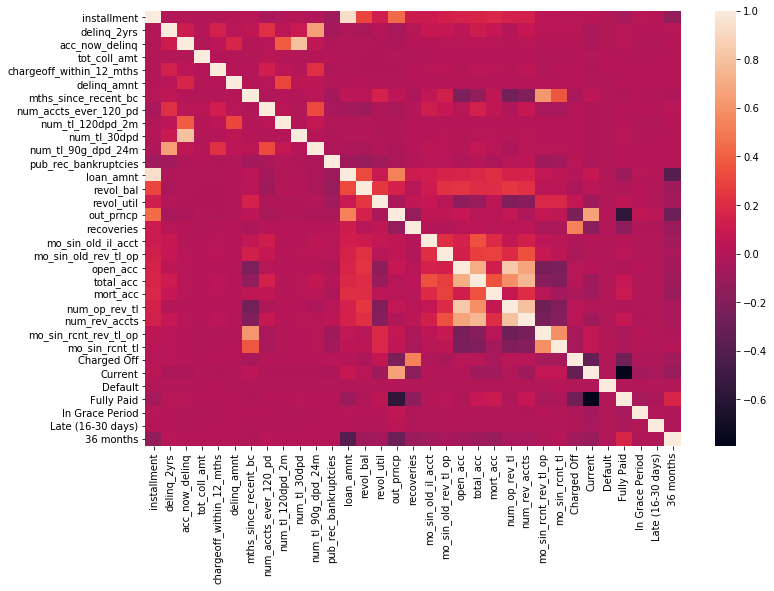

In [131]:
##coorelation metrix in graph 
sns.heatmap(Correlation_Variables) # Heat Map

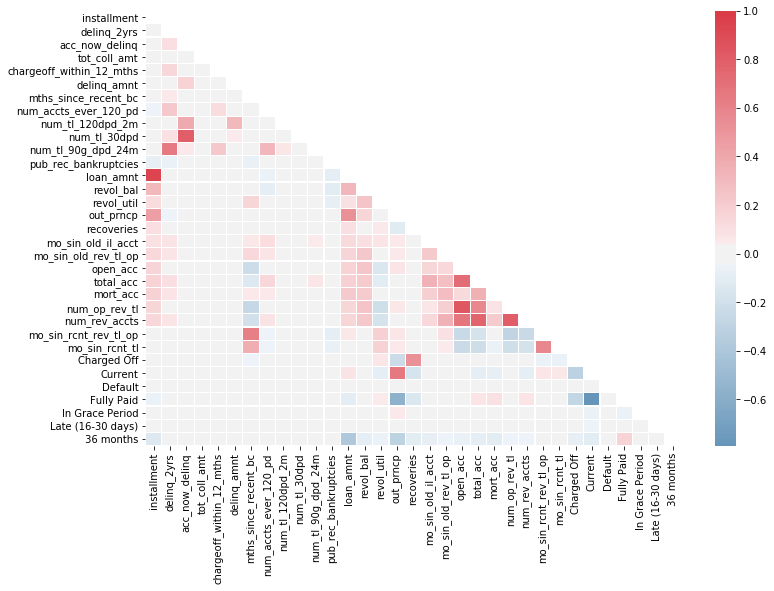

In [132]:
# Removing Top Right Triangle
mask = np.zeros_like(Correlation_Variables, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(Correlation_Variables, mask=mask, linewidths=.15, cmap=cmap, center=0)

In [133]:
#Drop Variables which are highly correlated
Independent_Variable.drop(columns = ['num_tl_30dpd','installment','open_acc'], inplace = True)

In [134]:
#Drop Variables which are highly correlated
Independent_Variable.drop(columns = ['num_rev_accts'], inplace = True)

In [135]:
#Correlation of Variables with Target Variable
Independent_Variable.corrwith(Target_Variable, axis = 0)

delinq_2yrs                -0.038210
acc_now_delinq             -0.010428
tot_coll_amt               -0.001442
chargeoff_within_12_mths   -0.002433
delinq_amnt                -0.003768
mths_since_recent_bc        0.050966
num_accts_ever_120_pd      -0.024886
num_tl_120dpd_2m           -0.003587
num_tl_90g_dpd_24m         -0.018676
pub_rec_bankruptcies       -0.017025
loan_amnt                   0.041775
revol_bal                   0.042430
revol_util                 -0.087842
out_prncp                   0.195020
recoveries                 -0.299822
mo_sin_old_il_acct          0.034748
mo_sin_old_rev_tl_op        0.072981
total_acc                   0.021081
mort_acc                    0.054166
num_op_rev_tl               0.001307
mo_sin_rcnt_rev_tl_op       0.059721
mo_sin_rcnt_tl              0.055227
Charged Off                -0.651950
Current                     0.271688
Default                    -0.007692
Fully Paid                  0.147884
In Grace Period            -0.003155
L

# Train-Test Split

In [136]:
#Import Required Libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
import warnings

import itertools

from imblearn.over_sampling import SMOTE

In [137]:
#split dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(Independent_Variable, Target_Variable, test_size=0.2, random_state=42)

In [138]:
#print train & test data shape 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1909013, 29) (1909013,)
(477254, 29) (477254,)


# Undersampling

In [139]:
# describes info about train and test set 
print("Number of X_train data: ", X_train.shape) 
print("Number of y_train data: ", y_train.shape) 
print("Number of X_test data: ", X_test.shape) 
print("Number of y_test data: ", y_test.shape) 

Number of X_train data:  (1909013, 29)
Number of y_train data:  (1909013,)
Number of X_test data:  (477254, 29)
Number of y_test data:  (477254,)


In [140]:
#print before undersampling data 
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before UnderSampling, counts of label '1': 1683232
Before UnderSampling, counts of label '0': 225781 



In [141]:
#import required libraries
from imblearn.under_sampling import RandomUnderSampler

In [142]:
##undersampling 
rus = RandomUnderSampler(random_state= 42)
X_train_Undersample, y_train_Undersample = rus.fit_sample(X_train, y_train)

In [143]:
#print data set after undersampling 
print('After Undersampling of data, the shape of train_X: {}'.format(X_train_Undersample.shape)) 
print('After Undersampling of data, the shape of train_y: {} \n'.format(y_train_Undersample.shape)) 
  
print("After Undersampling of data, counts of label '1': {}".format(sum(y_train_Undersample == 1))) 
print("After Undersampling of data, counts of label '0': {}".format(sum(y_train_Undersample == 0))) 

After Undersampling of data, the shape of train_X: (451562, 29)
After Undersampling of data, the shape of train_y: (451562,) 

After Undersampling of data, counts of label '1': 225781
After Undersampling of data, counts of label '0': 225781


# Evaluation Metrics

In [144]:
#Import Required Libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB

In [145]:
#Confusion Matrics
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [146]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Classification Models

# Decision Tree

In [147]:
clf_tree = DecisionTreeClassifier()

In [148]:
clf_tree.fit(X_train_Undersample, y_train_Undersample)

DecisionTreeClassifier()

In [149]:
y_pred_tree = clf_tree.predict_proba(X_test)[:,1]

In [150]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.29      0.76      0.42     56444
           1       0.96      0.75      0.84    420810

    accuracy                           0.76    477254
   macro avg       0.63      0.76      0.63    477254
weighted avg       0.88      0.76      0.79    477254



Confusion matrix, without normalization
[[ 43049  13395]
 [103411 317399]]


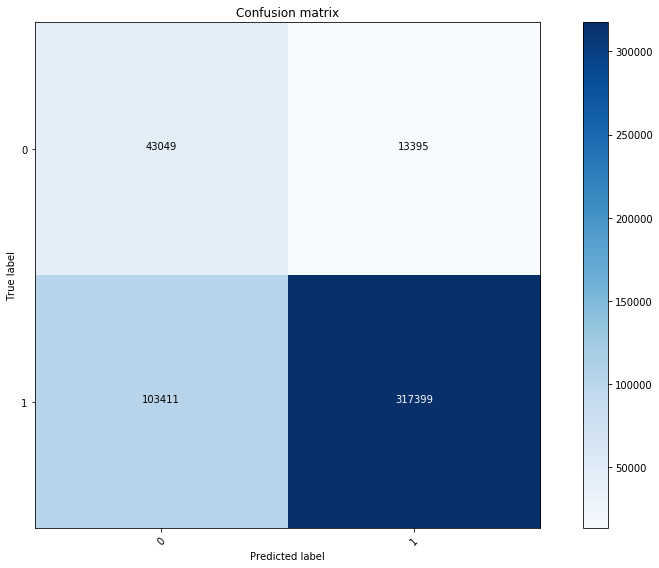

In [151]:
cnf_matrix = confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [152]:
# Creating true and false positive rates
false_positive_rate_tree, true_positive_rate_tree, threshold_tree = roc_curve(y_test, y_pred_tree)

In [153]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred_tree))

roc_auc_score for DecisionTree:  0.7584712025012267


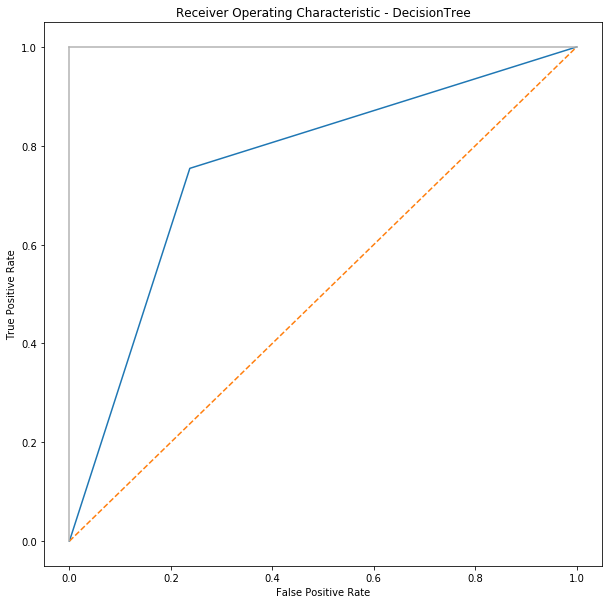

In [154]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate_tree, true_positive_rate_tree)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [155]:
#Import Required Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std

In [156]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [157]:
scores = cross_val_score(clf_tree, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.758 (0.002)


# Logistic Regression

In [158]:
clf_reg = LogisticRegression()

In [159]:
clf_reg.fit(X_train_Undersample, y_train_Undersample)

C:\Users\Nazmus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [160]:
y_pred_reg = clf_reg.predict_proba(X_test)[:,1]

In [161]:
print(classification_report(y_test, y_pred_reg.round())) 

              precision    recall  f1-score   support

           0       0.61      0.71      0.66     56444
           1       0.96      0.94      0.95    420810

    accuracy                           0.91    477254
   macro avg       0.78      0.83      0.80    477254
weighted avg       0.92      0.91      0.91    477254



Confusion matrix, without normalization
[[ 40347  16097]
 [ 25942 394868]]


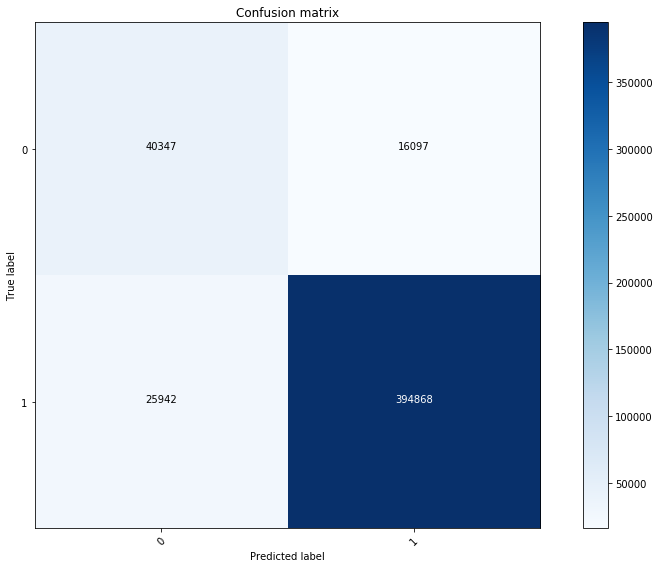

In [162]:
cnf_matrix = confusion_matrix(y_test, y_pred_reg.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [163]:
# Creating true and false positive rates
false_positive_rate_reg, true_positive_rate_reg, threshold_reg = roc_curve(y_test, y_pred_reg)

In [164]:
print('roc_auc_score for LogisticRegression: ', roc_auc_score(y_test, y_pred_reg))

roc_auc_score for LogisticRegression:  0.8976443893261248


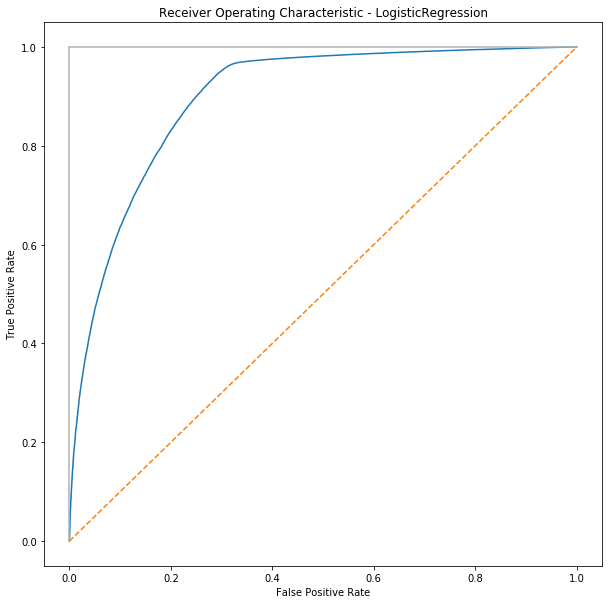

In [165]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LogisticRegression')
plt.plot(false_positive_rate_reg, true_positive_rate_reg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [166]:
scores = cross_val_score(clf_reg, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.825 (0.002)


# Naive Bayes

In [167]:
clf_NB = GaussianNB()

In [168]:
clf_NB.fit(X_train_Undersample, y_train_Undersample)

GaussianNB()

In [169]:
y_pred_NB = clf_NB.predict_proba(X_test)[:,1]

In [170]:
print(classification_report(y_test, y_pred_NB.round())) 

              precision    recall  f1-score   support

           0       0.64      0.65      0.65     56444
           1       0.95      0.95      0.95    420810

    accuracy                           0.92    477254
   macro avg       0.80      0.80      0.80    477254
weighted avg       0.92      0.92      0.92    477254



Confusion matrix, without normalization
[[ 36748  19696]
 [ 20375 400435]]


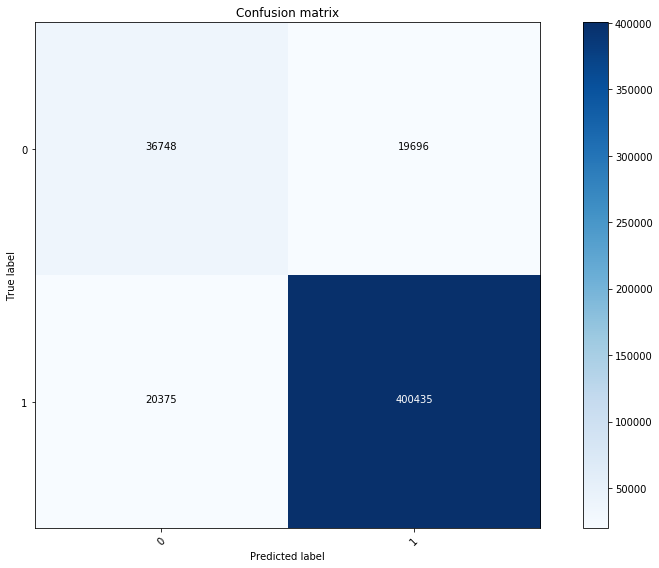

In [171]:
cnf_matrix = confusion_matrix(y_test, y_pred_NB.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [172]:
# Creating true and false positive rates
false_positive_rate_NB, true_positive_rate_NB, threshold_NB = roc_curve(y_test, y_pred_NB)

In [173]:
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_pred_NB))

roc_auc_score for Naive Bayes:  0.8609386278087042


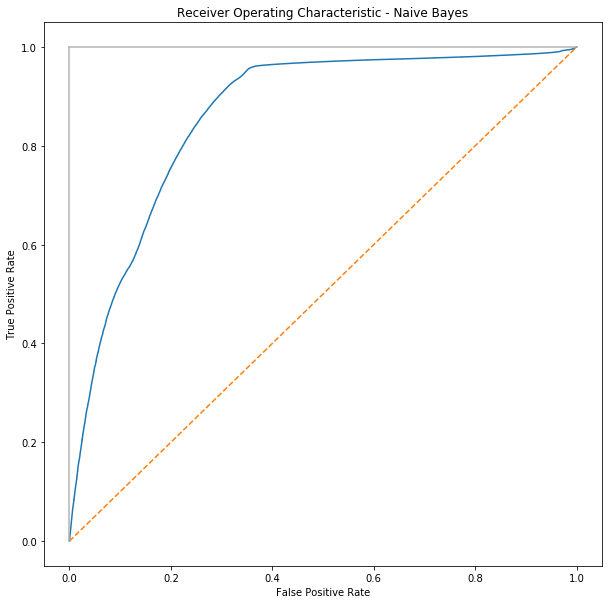

In [174]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate_NB, true_positive_rate_NB)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [175]:
scores = cross_val_score(clf_NB, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.800 (0.002)


# RandomForestClassifier

In [176]:
clf_rf = RandomForestClassifier()

In [177]:
clf_rf.fit(X_train_Undersample, y_train_Undersample)

RandomForestClassifier()

In [178]:
y_pred_rf = clf_rf.predict_proba(X_test)[:,1]

In [179]:
print(classification_report(y_test, y_pred_rf.round())) 

              precision    recall  f1-score   support

           0       0.53      0.75      0.62     56444
           1       0.96      0.91      0.94    420810

    accuracy                           0.89    477254
   macro avg       0.75      0.83      0.78    477254
weighted avg       0.91      0.89      0.90    477254



Confusion matrix, without normalization
[[ 42220  14224]
 [ 37379 383431]]


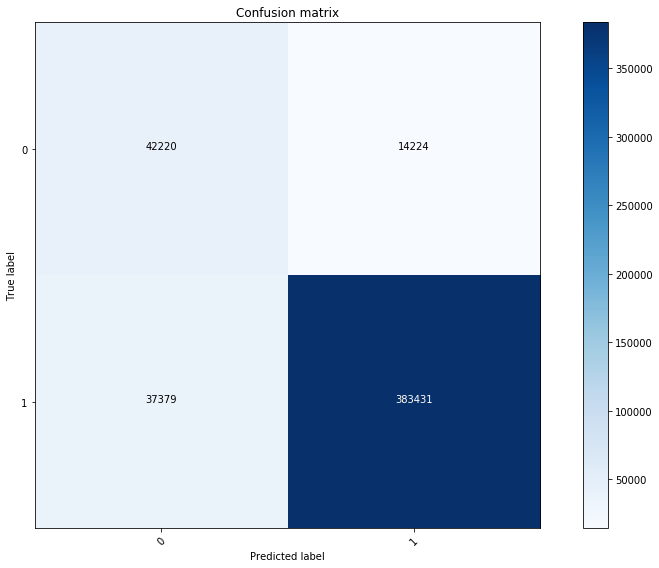

In [180]:
cnf_matrix = confusion_matrix(y_test, y_pred_rf.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [181]:
# Creating true and false positive rates
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test, y_pred_rf)

In [182]:
print('roc_auc_score for RandomForestClassifier: ', roc_auc_score(y_test, y_pred_rf))

roc_auc_score for RandomForestClassifier:  0.9047524095540987


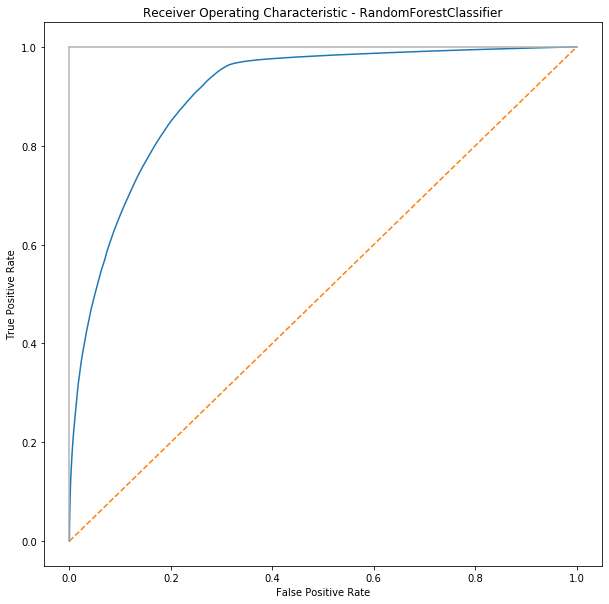

In [183]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [184]:
scores = cross_val_score(clf_rf, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.828 (0.002)
